### 1. Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### 2. Load Dataset

In [ ]:
# Memuat dataset
df = pd.read_csv('/content/hipertensi2label.csv', delimiter=';')


### 3. Preprocessing

In [ ]:
print(df.columns)  # Melihat semua kolom dalam dataset


Index(['id', 'sistolik', 'diastolik', 'jk', 'umur', 'diabetes', 'diagnosis'], dtype='object')


In [ ]:
# Pra-pemrosesan data
df = df.drop('id', axis=1)

In [ ]:
# Memisahkan dataset menjadi fitur (X) dan label (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
# Membagi dataset menjadi data training (80%) dan data testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(df.isnull().sum())  # Menunjukkan jumlah nilai kosong di setiap kolom
print(df[df.isna().any(axis=1)])  # Menampilkan baris yang mengandung nilai kosong atau tidak valid


sistolik     0
diastolik    0
jk           0
umur         0
diabetes     0
diagnosis    0
dtype: int64
Empty DataFrame
Columns: [sistolik, diastolik, jk, umur, diabetes, diagnosis]
Index: []


### 4. Pembuatan Model

In [ ]:
# Imputasi data yang hilang
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [ ]:
# Model: Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)


Best Parameters for Decision Tree:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [ ]:
# Prediksi
y_pred = model.predict(X_test)

### 6. Evaluasi Model

In [ ]:
# Menghitung metrik performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix for Decision Tree:
 [[3 2]
 [6 6]]
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           1       0.33      0.60      0.43         5
           2       0.75      0.50      0.60        12

    accuracy                           0.53        17
   macro avg       0.54      0.55      0.51        17
weighted avg       0.63      0.53      0.55        17



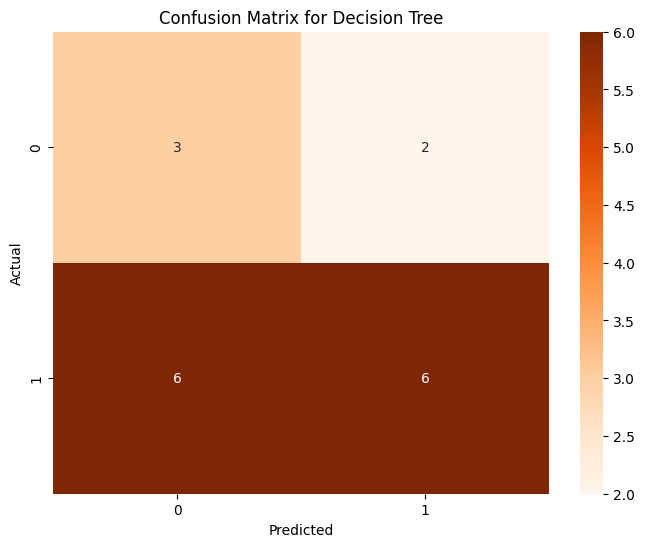

In [ ]:
#  Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualisasi Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluasi Decision Tree menggunakan Cross-Validation
cross_val_scores_tree = cross_val_score(grid_tree.best_estimator_, X_train, y_train, cv=5)
print("Cross-Validation Scores for Decision Tree:", cross_val_scores_tree)
print("Mean Cross-Validation Score for Decision Tree:", np.mean(cross_val_scores_tree))

Cross-Validation Scores for Decision Tree: [0.7        0.63333333 0.7        0.63333333 0.65517241]
Mean Cross-Validation Score for Decision Tree: 0.664367816091954


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Menghitung akurasi, presisi, dan recall
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree, pos_label=1)
recall = recall_score(y_test, y_pred_tree, pos_label=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.53
Precision: 0.33
Recall: 0.60
